By observing the generated images, we can see that the inteference steps are related to the noise level. More steps lead to clearer images, but not necessarily more recognizable.

In [1]:
import torch
torch.cuda.empty_cache()

In [2]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", use_safetensors=True)
if torch.cuda.is_available():
    pipeline.to('cuda')

/opt/anaconda3/envs/diffusers-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 17.71it/s]


100%|██████████| 50/50 [04:31<00:00,  5.43s/it]


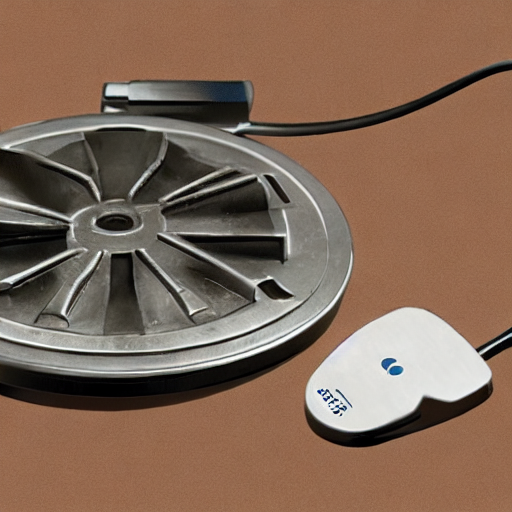

In [3]:
image = pipeline("a ppt tamplate in the setting of computer game").images[0]
image

Different schedulars come with different denoising and quality trade-offs. The best schedulars are the ones that can balance the trade-offs and generate the best images.

In [4]:
# Clear CUDA cache between generations
torch.cuda.empty_cache()

In [5]:
from diffusers import EulerDiscreteScheduler

pipeline = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", use_safetensors=True)
pipeline.scheduler = EulerDiscreteScheduler.from_config(pipeline.scheduler.config)
if torch.cuda.is_available():       
    pipeline.to('cuda')

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 20.08it/s]


100%|██████████| 50/50 [04:26<00:00,  5.33s/it]


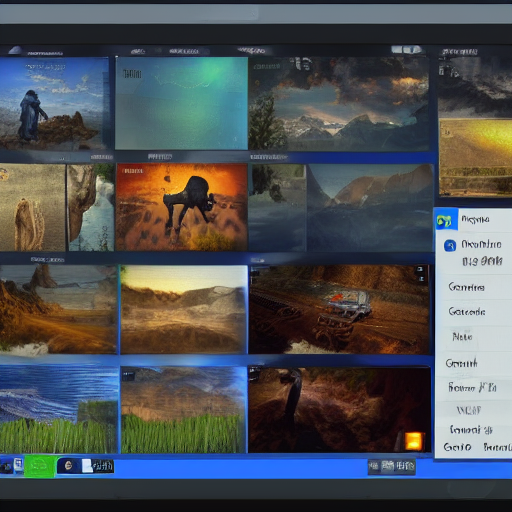

In [6]:
image = pipeline("a ppt tamplate in the setting of computer game").images[0]
image